In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/My Drive/BCT_genai/Diet.zip'
import zipfile
zip_ref=zipfile.ZipFile(path)
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
df=pd.read_csv('/content/diet_recommendations_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [ ]:
x=df.iloc[:,1:-1].values
x

array([[56, 'Male', 58.4, ..., 3.1, 96.6, 3.1],
       [69, 'Male', 101.2, ..., 4.5, 63.2, 0.6],
       [46, 'Female', 63.5, ..., 3.8, 57.5, 4.6],
       ...,
       [49, 'Female', 56.0, ..., 8.9, 68.6, 4.8],
       [64, 'Male', 66.6, ..., 6.7, 52.0, 0.1],
       [66, 'Female', 101.3, ..., 2.0, 68.2, 3.7]], dtype=object)

In [ ]:
y=df.iloc[:,-1].values
y

array(['Balanced', 'Low_Carb', 'Low_Sodium', 'Balanced', 'Low_Carb',
       'Balanced', 'Balanced', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Low_Sodium', 'Low_Carb', 'Low_Carb', 'Balanced', 'Balanced',
       'Balanced', 'Low_Sodium', 'Low_Carb', 'Balanced', 'Low_Carb',
       'Balanced', 'Balanced', 'Balanced', 'Balanced', 'Low_Carb',
       'Balanced', 'Low_Sodium', 'Balanced', 'Low_Carb', 'Balanced',
       'Balanced', 'Low_Carb', 'Low_Sodium', 'Balanced', 'Low_Sodium',
       'Low_Carb', 'Low_Carb', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Low_Carb', 'Low_Sodium', 'Low_Sodium', 'Low_Carb', 'Low_Sodium',
       'Low_Sodium', 'Low_Sodium', 'Balanced', 'Low_Carb', 'Balanced',
       'Low_Sodium', 'Low_Sodium', 'Balanced', 'Low_Sodium', 'Balanced',
       'Balanced', 'Low_Sodium', 'Balanced', 'Balanced', 'Low_Carb',
       'Low_Carb', 'Low_Carb', 'Balanced', 'Balanced', 'Balanced',
       'Balanced', 'Low_Sodium', 'Low_Carb', 'Balanced', 'Low_Sodium',
       'Balanced', 'Low_

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,204
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0


In [ ]:
df["Dietary_Restrictions"]=df["Dietary_Restrictions"].fillna('Missing')
df["Allergies"]=df["Allergies"].fillna('Missing')
df["Disease_Type"]=df["Disease_Type"].fillna('Missing')

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,0
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0


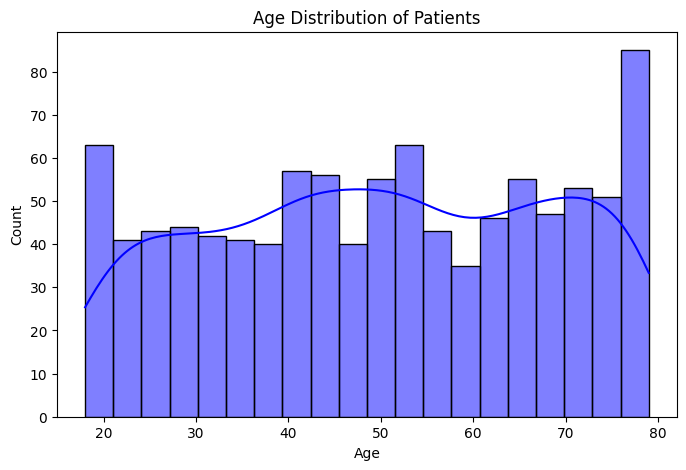

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<ipython-input-86-4d27a1eb3752>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Disease_Type'], order=df['Disease_Type'].value_counts().index, palette="coolwarm")


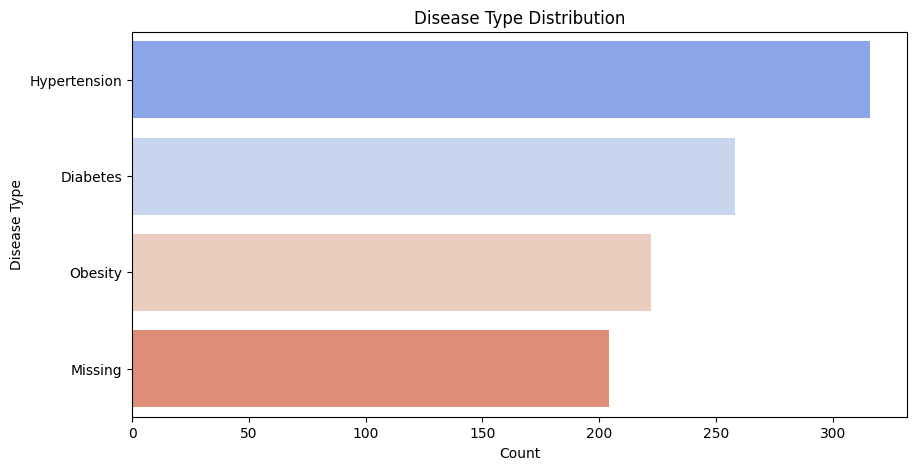

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Disease_Type'], order=df['Disease_Type'].value_counts().index, palette="coolwarm")
plt.title("Disease Type Distribution")
plt.xlabel("Count")
plt.ylabel("Disease Type")
plt.show()

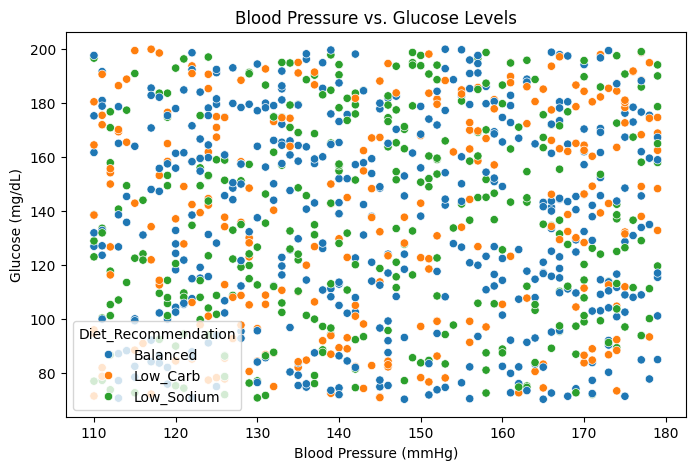

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Blood_Pressure_mmHg'], y=df['Glucose_mg/dL'], hue=df['Diet_Recommendation'])
plt.title("Blood Pressure vs. Glucose Levels")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Glucose (mg/dL)")
plt.show()

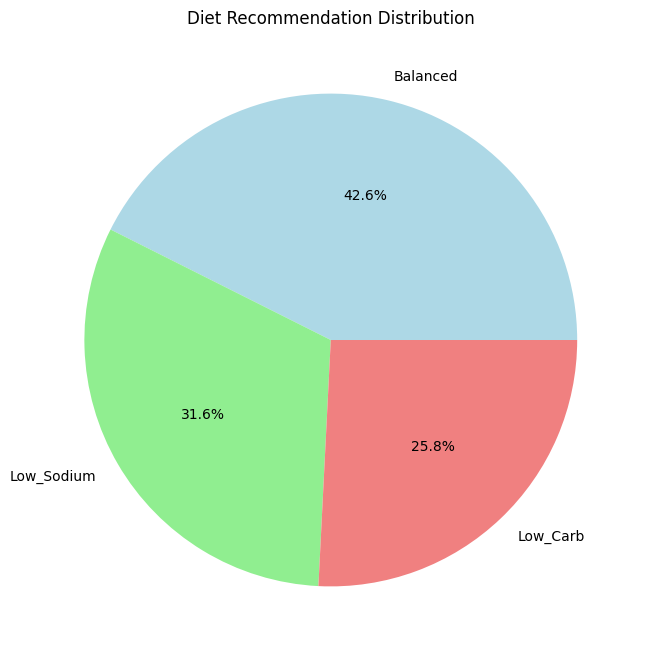

In [ ]:
plt.figure(figsize=(8, 8))
df['Diet_Recommendation'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Diet Recommendation Distribution")
plt.ylabel("")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
en1=LabelEncoder()
en2=LabelEncoder()
en3=LabelEncoder()
en4=LabelEncoder()
en5=LabelEncoder()
en6=LabelEncoder()
en7=LabelEncoder()
x[:,1]=en1.fit_transform(x[:,1])
x[:,5]=en2.fit_transform(x[:,5])
x[:,6]=en3.fit_transform(x[:,6])
x[:,7]=en4.fit_transform(x[:,7])
x[:,12]=en5.fit_transform(x[:,12])
x[:,13]=en6.fit_transform(x[:,13])
x[:,14]=en7.fit_transform(x[:,14])
x

array([[56, 1, 58.4, ..., 3.1, 96.6, 3.1],
       [69, 1, 101.2, ..., 4.5, 63.2, 0.6],
       [46, 0, 63.5, ..., 3.8, 57.5, 4.6],
       ...,
       [49, 0, 56.0, ..., 8.9, 68.6, 4.8],
       [64, 1, 66.6, ..., 6.7, 52.0, 0.1],
       [66, 0, 101.3, ..., 2.0, 68.2, 3.7]], dtype=object)

In [ ]:
en8=LabelEncoder()
y=en8.fit_transform(y.ravel())
y

array([0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2,
       0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2,
       1, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.33929464,  0.95501094, -1.30502557, ..., -0.72578563,
         1.46539924,  0.43238034],
       [ 1.05732009,  0.95501094,  0.826653  , ..., -0.23396574,
        -0.78846937, -1.28123864],
       [-0.21303263, -1.04710843, -1.05101715, ..., -0.47987568,
        -1.17311162,  1.46055173],
       ...,
       [-0.04733445, -1.04710843, -1.42455895, ...,  1.31175388,
        -0.42407145,  1.59764125],
       [ 0.78115646,  0.95501094, -0.89661987, ...,  0.53889407,
        -1.54425765, -1.62396244],
       [ 0.89162191, -1.04710843,  0.83163355, ..., -1.11221553,
        -0.45106389,  0.8436489 ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
ann_model=Sequential()
ann_model.add(Dense(units=32,activation='relu',input_dim=18))
ann_model.add(Dense(units=16,activation='relu'))
ann_model.add(Dense(units=3,activation='softmax'))
ann_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,187 (4.64 KB)

 Trainable params: 1,187 (4.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
ann_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
ann_model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2860 - loss: 1.2933 - val_accuracy: 0.4000 - val_loss: 1.1140
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3711 - loss: 1.1635 - val_accuracy: 0.4800 - val_loss: 1.0525
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4854 - loss: 1.0616 - val_accuracy: 0.5750 - val_loss: 0.9967
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5426 - loss: 1.0124 - val_accuracy: 0.6450 - val_loss: 0.9273
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6226 - loss: 0.9212 - val_accuracy: 0.7100 - val_loss: 0.8325
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6829 - loss: 0.8294 - val_accuracy: 0.7350 - val_loss: 0.7259
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7063 - loss: 0.7093 - val_accuracy: 0.7650 - val_loss: 0.6199
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7829 - loss: 0.6160 - val_accuracy: 0.8100 - val_loss

In [ ]:
y_pred=ann_model.predict(x_test)
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.9457319 , 0.01501407, 0.03925406],
       [0.9381896 , 0.02027827, 0.041532  ],
       [0.0228941 , 0.6873737 , 0.2897323 ],
       [0.64406765, 0.09683935, 0.25909296],
       [0.02335226, 0.62870574, 0.34794196],
       [0.14359015, 0.55926627, 0.29714346],
       [0.9462543 , 0.00947938, 0.04426639],
       [0.25276598, 0.17065746, 0.5765766 ],
       [0.15677355, 0.37144706, 0.47177938],
       [0.03631321, 0.4243124 , 0.53937435],
       [0.4745224 , 0.20539865, 0.32007882],
       [0.19886823, 0.15435784, 0.64677393],
       [0.9738119 , 0.00697696, 0.01921107],
       [0.1956674 , 0.15099727, 0.6533353 ],
       [0.9753341 , 0.00748142, 0.01718441],
       [0.35149854, 0.17804657, 0.47045478],
       [0.02518812, 0.6367073 , 0.3381046 ],
       [0.10226101, 0.22880118, 0.6689378 ],
       [0.9828029 , 0.00765662, 0.00954055],
       [0.03198662, 0.7844966 , 0.18351683],
       [0.03020971, 0.73550904, 0.23428121],
       [0.9804691 , 0.00442534, 0.01510541],
       [0.

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1,
       1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2,
       2, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       1, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred, average='weighted'))
print("Recall =", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score =", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[93  0  2]
 [ 0 50  2]
 [ 4 12 37]]
Accuracy = 0.9
Precision = 0.904236131952274
Recall = 0.9
F1 Score = 0.8968434467151922
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.81      0.96      0.88        52
           2       0.90      0.70      0.79        53

    accuracy                           0.90       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.90      0.90      0.90       200



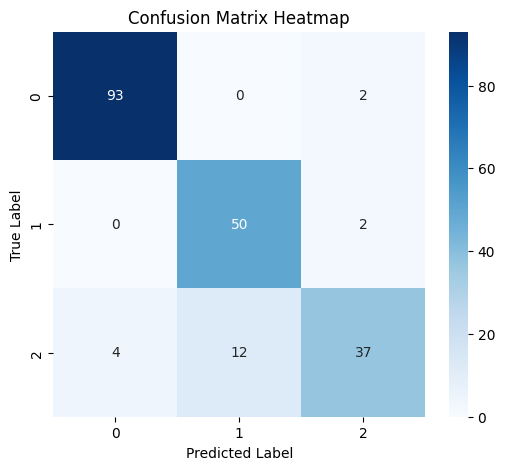

Class 0:
True Positives (TP): 93
False Positives (FP): 4
False Negatives (FN): 2
True Negatives (TN): 101

Class 1:
True Positives (TP): 50
False Positives (FP): 12
False Negatives (FN): 2
True Negatives (TN): 136

Class 2:
True Positives (TP): 37
False Positives (FP): 4
False Negatives (FN): 16
True Negatives (TN): 143



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


# Compute TP, FP, FN, TN for each class
num_classes = cm.shape[0]
for i in range(num_classes):
    TP = cm[i, i]  # Correct predictions for class i
    FP = cm[:, i].sum() - TP  # Wrongly predicted as class i
    FN = cm[i, :].sum() - TP  # Missed class i
    TN = cm.sum() - (TP + FP + FN)  # Everything else

    print(f"Class {i}:")
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}\n")

In [ ]:
ann_model.save('/content/drive/My Drive/BCT_genai/my_model_diet.keras')